In [25]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library

In [2]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('NEWS*.txt')
type(file_list)
file_list

['NEWS1.19-2.19.txt', 'NEWS11.19-12.19.txt', 'NEWS12.19-1.19.txt']

In [3]:
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
for file in file_list:
    with open(file ,'r') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [4]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [5]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.cache
Loading model cost 0.748 seconds.
Prefix dict has been built succesfully.
D:\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,,,&,(,),+,",",-,.,.%,...,Ｉ,Ｋ,Ｍ,Ｐ,Ｒ,Ｓ,Ｔ,Ｙ,＼,～
0,603,326,2,41,41,1,24,57,48,1.0,...,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,33
1,524,353,3,68,66,1,19,33,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,492,423,1,32,32,2,18,28,4,0.0,...,0.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,19


In [6]:
#去除標點符號(觀察表格中標點符號位置)
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

,冒險,冠,冬季,冷,冷凝器,冷氣團,冷軋,准駁,凌厲,凌巨,...,Ｉ,Ｋ,Ｍ,Ｐ,Ｒ,Ｓ,Ｔ,Ｙ,＼,～
0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,33
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,19


In [7]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df1 = df_tfidf[df_tfidf>0.01].dropna(axis=1)
df1

,到,及,可望,和,國巨,在,對,巨,已,市場,...,達,部分,都,電子,需求,％,（,）,，,；
0,0.026882,0.027979,0.018104,0.021945,0.051021,0.071869,0.032368,0.014264,0.017556,0.030174,...,0.013715,0.011521,0.015361,0.012618,0.015361,0.056507,0.078452,0.079001,0.920028,0.025785
1,0.034052,0.023715,0.020067,0.015202,0.060808,0.072361,0.019458,0.013986,0.021891,0.043173,...,0.020067,0.010337,0.015810,0.017634,0.012162,0.058983,0.062632,0.063848,0.929749,0.031012
2,0.042018,0.018346,0.014203,0.018938,0.072200,0.082260,0.021897,0.018938,0.016570,0.036100,...,0.011244,0.018346,0.020713,0.018938,0.018938,0.044977,0.059772,0.059772,0.915517,0.025447


In [8]:
df1 = df1.drop(df1.columns.tolist()[49:],axis=1)
df1

,到,及,可望,和,國巨,在,對,巨,已,市場,...,與,華,表示,被動,調漲,達,部分,都,電子,需求
0,0.026882,0.027979,0.018104,0.021945,0.051021,0.071869,0.032368,0.014264,0.017556,0.030174,...,0.022493,0.016458,0.018104,0.031820,0.041695,0.013715,0.011521,0.015361,0.012618,0.015361
1,0.034052,0.023715,0.020067,0.015202,0.060808,0.072361,0.019458,0.013986,0.021891,0.043173,...,0.023715,0.030404,0.020675,0.040741,0.013378,0.020067,0.010337,0.015810,0.017634,0.012162
2,0.042018,0.018346,0.014203,0.018938,0.072200,0.082260,0.021897,0.018938,0.016570,0.036100,...,0.024856,0.012428,0.020713,0.052670,0.027815,0.011244,0.018346,0.020713,0.018938,0.018938


In [10]:
#df1.to_csv("Matrix.csv", encoding = 'big5')

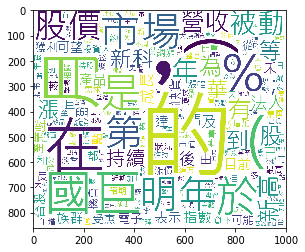

In [11]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()

In [36]:
X = df1.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [33]:
#from sklearn.decomposition import PCA as sklearnPCA
#sklearn_pca = sklearnPCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(X_std)
#Y_sklearn

array([[-0.7795825 ,  6.4252237 ],
       [ 6.85071005, -2.63115524],
       [-6.07112756, -3.79406846]])

In [41]:
pca = PCA(n_components=3)
x_7d = pca.fit_transform(X_std)
x_7d

array([[ -7.79582496e-01,   6.42522370e+00,   1.45937591e-15],
       [  6.85071005e+00,  -2.63115524e+00,   1.45937591e-15],
       [ -6.07112756e+00,  -3.79406846e+00,   1.45937591e-15]])

In [42]:
pca4 = PCA(n_components=2)
x_4d = pca.fit_transform(X_std)
x_4d

array([[ -7.79582496e-01,   6.42522370e+00,   1.45937591e-15],
       [  6.85071005e+00,  -2.63115524e+00,   1.45937591e-15],
       [ -6.07112756e+00,  -3.79406846e+00,   1.45937591e-15]])

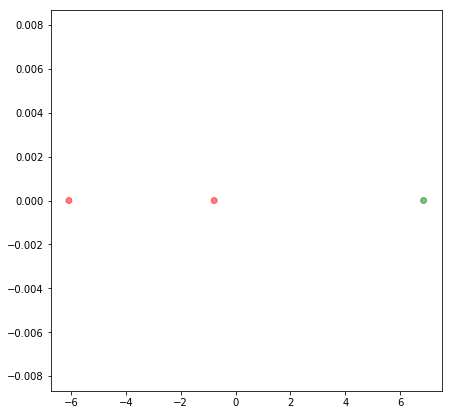

In [44]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()